__Libraries__

In [27]:
import os
import shutil
import random
from collections import Counter
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

__Convolutional Neural Network Setup (EfficientNetV2L)__

In [28]:
file_location = os.getcwd()

train_path = file_location+"/data/train"
valid_path = file_location+"/data/valid"
test_path = file_location+"/data/test"
test_TI_SD1_path = file_location+"/data/TISD1"
test_TI_SD2_path = file_location+"/data/TISD2"
test_TI_SD3_path = file_location+"/data/TISD3"
test_TI_SD4_path = file_location+"/data/TISD4"

In [29]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD1_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD1_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD2_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD2_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD3_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD3_path,target_size=(224,224), batch_size=10, shuffle=False)

TISD4_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(directory=test_TI_SD4_path,target_size=(224,224), batch_size=10, shuffle=False)

Found 330 images belonging to 5 classes.
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [4]:
efficientnetv2l = tf.keras.applications.efficientnet_v2.EfficientNetV2L()
#efficientnetv2l.summary()

2023-02-04 12:32:08.653263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


478307632/478307632 [==============================] - 20s 0us/step


In [10]:
x = efficientnetv2l.layers[-2].output
output = Dense(units=5, activation="softmax")(x)

In [11]:
model = Model(inputs=efficientnetv2l.input, outputs=output)

In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 120, 120, 64  8192        ['block2a_expand_activation[0][0]
                                )                                ']                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 120, 120, 64  256        ['block2a_project_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 120, 120, 25  147456      ['block2a_project_bn[0][0]']     
                                6)                                                                
                                                                                                  
 block2b_e

 lization)                      )                                                                 
                                                                                                  
 block2e_drop (Dropout)         (None, 120, 120, 64  0           ['block2e_project_bn[0][0]']     
                                )                                                                 
                                                                                                  
 block2e_add (Add)              (None, 120, 120, 64  0           ['block2e_drop[0][0]',           
                                )                                 'block2d_add[0][0]']            
                                                                                                  
 block2f_expand_conv (Conv2D)   (None, 120, 120, 25  147456      ['block2e_add[0][0]']            
                                6)                                                                
          

 block3c_expand_conv (Conv2D)   (None, 60, 60, 384)  331776      ['block3b_add[0][0]']            
                                                                                                  
 block3c_expand_bn (BatchNormal  (None, 60, 60, 384)  1536       ['block3c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3c_expand_activation (Act  (None, 60, 60, 384)  0          ['block3c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3c_project_conv (Conv2D)  (None, 60, 60, 96)   36864       ['block3c_expand_activation[0][0]
                                                                 ']                               
          

                                                                                                  
 block3g_project_conv (Conv2D)  (None, 60, 60, 96)   36864       ['block3g_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block3g_project_bn (BatchNorma  (None, 60, 60, 96)  384         ['block3g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block3g_drop (Dropout)         (None, 60, 60, 96)   0           ['block3g_project_bn[0][0]']     
                                                                                                  
 block3g_add (Add)              (None, 60, 60, 96)   0           ['block3g_drop[0][0]',           
          

                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_expand_conv (Conv2D)   (None, 30, 30, 768)  147456      ['block4b_add[0][0]']            
                                                                                                  
 block4c_expand_bn (BatchNormal  (None, 30, 30, 768)  3072       ['block4c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4c_expand_activation (Act  (None, 30, 30, 768)  0          ['block4c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4c_d

 ization)                                                                                         
                                                                                                  
 block4e_expand_activation (Act  (None, 30, 30, 768)  0          ['block4e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4e_dwconv2 (DepthwiseConv  (None, 30, 30, 768)  6912       ['block4e_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4e_bn (BatchNormalization  (None, 30, 30, 768)  3072       ['block4e_dwconv2[0][0]']        
 )                                                                                                
          

 block4g_dwconv2 (DepthwiseConv  (None, 30, 30, 768)  6912       ['block4g_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block4g_bn (BatchNormalization  (None, 30, 30, 768)  3072       ['block4g_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block4g_activation (Activation  (None, 30, 30, 768)  0          ['block4g_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 768)         0           ['block4g_activation[0][0]']     
 agePoolin

                                                                                                  
 block4i_activation (Activation  (None, 30, 30, 768)  0          ['block4i_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4i_se_squeeze (GlobalAver  (None, 768)         0           ['block4i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4i_se_reshape (Reshape)   (None, 1, 1, 768)    0           ['block4i_se_squeeze[0][0]']     
                                                                                                  
 block4i_se_reduce (Conv2D)     (None, 1, 1, 48)     36912       ['block4i_se_reshape[0][0]']     
          

 block5a_se_squeeze (GlobalAver  (None, 1152)        0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 30, 30, 1152  0           ['block5a_activation[0][0]',     
          

                                                                                                  
 block5c_se_excite (Multiply)   (None, 30, 30, 1344  0           ['block5c_activation[0][0]',     
                                )                                 'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 30, 30, 224)  301056      ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 30, 30, 224)  0           ['block5c_project_bn[0][0]']     
          

                                                                                                  
 block5e_project_conv (Conv2D)  (None, 30, 30, 224)  301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_drop (Dropout)         (None, 30, 30, 224)  0           ['block5e_project_bn[0][0]']     
                                                                                                  
 block5e_add (Add)              (None, 30, 30, 224)  0           ['block5e_drop[0][0]',           
                                                                  'block5d_add[0][0]']            
          

 block5g_project_bn (BatchNorma  (None, 30, 30, 224)  896        ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_drop (Dropout)         (None, 30, 30, 224)  0           ['block5g_project_bn[0][0]']     
                                                                                                  
 block5g_add (Add)              (None, 30, 30, 224)  0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5g_add[0][0]']            
                                )                                                                 
          

 block5i_drop (Dropout)         (None, 30, 30, 224)  0           ['block5i_project_bn[0][0]']     
                                                                                                  
 block5i_add (Add)              (None, 30, 30, 224)  0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block5j_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5i_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5j_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5j_expand_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                  'block5j_add[0][0]']            
                                                                                                  
 block5l_expand_conv (Conv2D)   (None, 30, 30, 1344  301056      ['block5k_add[0][0]']            
                                )                                                                 
                                                                                                  
 block5l_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5l_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5l_expand_activation (Act  (None, 30, 30, 1344  0          ['block5l_expand_bn[0][0]']      
 ivation)                       )                                                                 
          

                                )                                                                 
                                                                                                  
 block5n_expand_bn (BatchNormal  (None, 30, 30, 1344  5376       ['block5n_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block5n_expand_activation (Act  (None, 30, 30, 1344  0          ['block5n_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5n_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5n_expand_activation[0][0]
 2D)                            )                                ']                               
          

 ization)                       )                                                                 
                                                                                                  
 block5p_expand_activation (Act  (None, 30, 30, 1344  0          ['block5p_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block5p_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5p_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5p_bn (BatchNormalization  (None, 30, 30, 1344  5376       ['block5p_dwconv2[0][0]']        
 )                              )                                                                 
          

 ivation)                       )                                                                 
                                                                                                  
 block5r_dwconv2 (DepthwiseConv  (None, 30, 30, 1344  12096      ['block5r_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block5r_bn (BatchNormalization  (None, 30, 30, 1344  5376       ['block5r_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block5r_activation (Activation  (None, 30, 30, 1344  0          ['block5r_bn[0][0]']             
 )                              )                                                                 
          

 2D)                            )                                ']                               
                                                                                                  
 block6a_bn (BatchNormalization  (None, 15, 15, 1344  5376       ['block6a_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6a_activation (Activation  (None, 15, 15, 1344  0          ['block6a_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6a_se_squeeze (GlobalAver  (None, 1344)        0           ['block6a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6c_se_squeeze (GlobalAver  (None, 2304)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6c_se_reshape[0][0]']     
                                                                                                  
 block6c_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6c_activation[0][0]',     
          

 block6e_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6e_se_squeeze[0][0]']     
                                                                                                  
 block6e_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6e_se_reshape[0][0]']     
                                                                                                  
 block6e_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6e_se_reduce[0][0]']      
                                                                                                  
 block6e_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6e_activation[0][0]',     
                                )                                 'block6e_se_expand[0][0]']      
                                                                                                  
 block6e_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6e_se_excite[0][0]']      
          

                                                                                                  
 block6g_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6g_se_reduce[0][0]']      
                                                                                                  
 block6g_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6g_activation[0][0]',     
                                )                                 'block6g_se_expand[0][0]']      
                                                                                                  
 block6g_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6g_se_excite[0][0]']      
                                                                                                  
 block6g_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6g_project_conv[0][0]']   
 lization)                                                                                        
          

 block6i_se_excite (Multiply)   (None, 15, 15, 2304  0           ['block6i_activation[0][0]',     
                                )                                 'block6i_se_expand[0][0]']      
                                                                                                  
 block6i_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6i_se_excite[0][0]']      
                                                                                                  
 block6i_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6i_drop (Dropout)         (None, 15, 15, 384)  0           ['block6i_project_bn[0][0]']     
                                                                                                  
 block6i_a

 block6k_project_conv (Conv2D)  (None, 15, 15, 384)  884736      ['block6k_se_excite[0][0]']      
                                                                                                  
 block6k_project_bn (BatchNorma  (None, 15, 15, 384)  1536       ['block6k_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6k_drop (Dropout)         (None, 15, 15, 384)  0           ['block6k_project_bn[0][0]']     
                                                                                                  
 block6k_add (Add)              (None, 15, 15, 384)  0           ['block6k_drop[0][0]',           
                                                                  'block6j_add[0][0]']            
                                                                                                  
 block6l_e

 lization)                                                                                        
                                                                                                  
 block6m_drop (Dropout)         (None, 15, 15, 384)  0           ['block6m_project_bn[0][0]']     
                                                                                                  
 block6m_add (Add)              (None, 15, 15, 384)  0           ['block6m_drop[0][0]',           
                                                                  'block6l_add[0][0]']            
                                                                                                  
 block6n_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6m_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6n_e

                                                                                                  
 block6o_add (Add)              (None, 15, 15, 384)  0           ['block6o_drop[0][0]',           
                                                                  'block6n_add[0][0]']            
                                                                                                  
 block6p_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6o_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6p_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6p_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6p_e

                                                                                                  
 block6r_expand_conv (Conv2D)   (None, 15, 15, 2304  884736      ['block6q_add[0][0]']            
                                )                                                                 
                                                                                                  
 block6r_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6r_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6r_expand_activation (Act  (None, 15, 15, 2304  0          ['block6r_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6r_d

                                                                                                  
 block6t_expand_bn (BatchNormal  (None, 15, 15, 2304  9216       ['block6t_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block6t_expand_activation (Act  (None, 15, 15, 2304  0          ['block6t_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6t_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6t_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6t_b

                                                                                                  
 block6v_expand_activation (Act  (None, 15, 15, 2304  0          ['block6v_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block6v_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6v_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6v_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block6v_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6v_a

                                                                                                  
 block6x_dwconv2 (DepthwiseConv  (None, 15, 15, 2304  20736      ['block6x_expand_activation[0][0]
 2D)                            )                                ']                               
                                                                                                  
 block6x_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block6x_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block6x_activation (Activation  (None, 15, 15, 2304  0          ['block6x_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block6x_s

                                                                                                  
 block7a_bn (BatchNormalization  (None, 15, 15, 2304  9216       ['block7a_dwconv2[0][0]']        
 )                              )                                                                 
                                                                                                  
 block7a_activation (Activation  (None, 15, 15, 2304  0          ['block7a_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block7a_se_squeeze (GlobalAver  (None, 2304)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_s

 agePooling2D)                                                                                    
                                                                                                  
 block7c_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7c_se_squeeze[0][0]']     
                                                                                                  
 block7c_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7c_se_reshape[0][0]']     
                                                                                                  
 block7c_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7c_se_reduce[0][0]']      
                                                                                                  
 block7c_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7c_activation[0][0]',     
                                )                                 'block7c_se_expand[0][0]']      
          

                                                                                                  
 block7e_se_reduce (Conv2D)     (None, 1, 1, 160)    614560      ['block7e_se_reshape[0][0]']     
                                                                                                  
 block7e_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7e_se_reduce[0][0]']      
                                                                                                  
 block7e_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7e_activation[0][0]',     
                                )                                 'block7e_se_expand[0][0]']      
                                                                                                  
 block7e_project_conv (Conv2D)  (None, 15, 15, 640)  2457600     ['block7e_se_excite[0][0]']      
                                                                                                  
 block7e_p

 block7g_se_expand (Conv2D)     (None, 1, 1, 3840)   618240      ['block7g_se_reduce[0][0]']      
                                                                                                  
 block7g_se_excite (Multiply)   (None, 15, 15, 3840  0           ['block7g_activation[0][0]',     
                                )                                 'block7g_se_expand[0][0]']      
                                                                                                  
 block7g_project_conv (Conv2D)  (None, 15, 15, 640)  2457600     ['block7g_se_excite[0][0]']      
                                                                                                  
 block7g_project_bn (BatchNorma  (None, 15, 15, 640)  2560       ['block7g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block7g_d

__Train model__

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose = 2)

Epoch 1/30
33/33 - 251s - loss: 1.3335 - accuracy: 0.4364 - val_loss: 1.0130 - val_accuracy: 0.5733 - 251s/epoch - 8s/step
Epoch 2/30
33/33 - 259s - loss: 0.8492 - accuracy: 0.7061 - val_loss: 0.8623 - val_accuracy: 0.7067 - 259s/epoch - 8s/step
Epoch 3/30
33/33 - 242s - loss: 0.6551 - accuracy: 0.8091 - val_loss: 0.7926 - val_accuracy: 0.7200 - 242s/epoch - 7s/step
Epoch 4/30
33/33 - 221s - loss: 0.4717 - accuracy: 0.8788 - val_loss: 0.6921 - val_accuracy: 0.7067 - 221s/epoch - 7s/step
Epoch 5/30
33/33 - 218s - loss: 0.3284 - accuracy: 0.9455 - val_loss: 0.7294 - val_accuracy: 0.7467 - 218s/epoch - 7s/step
Epoch 6/30
33/33 - 147s - loss: 0.2824 - accuracy: 0.9333 - val_loss: 0.7290 - val_accuracy: 0.7067 - 147s/epoch - 4s/step
Epoch 7/30
33/33 - 160s - loss: 0.1879 - accuracy: 0.9576 - val_loss: 0.7081 - val_accuracy: 0.7200 - 160s/epoch - 5s/step
Epoch 8/30
33/33 - 144s - loss: 0.2068 - accuracy: 0.9455 - val_loss: 0.7226 - val_accuracy: 0.7333 - 144s/epoch - 4s/step
Epoch 9/30
33/33

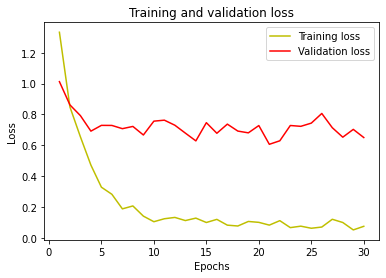

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

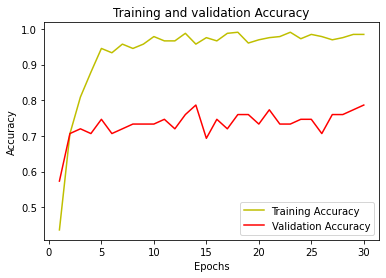

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

__Predictions for Test Data__

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [19]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose = 0)

Confusion Matrix without normalization
[[4 0 0 1 0]
 [2 3 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 1 4]]


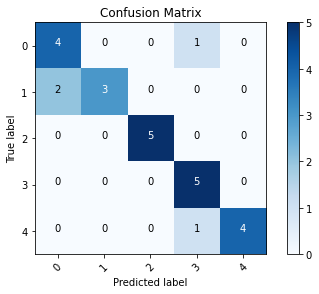

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
#test_batches.class_indices
cm_plot_labels = ["0","1","2","3","4"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

__Predictions for Textual Inversion Trained Stable Diffusion 2 generated data__

In [43]:
#TISD1 were images created by Stable Diffusion with prompt: "painting in the style of <Cezanne>"
TISD1_labels = TISD1_batches.classes

In [44]:
predictions = model.predict(x=TISD1_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({0: 27, 1: 48, 4: 21, 3: 4})

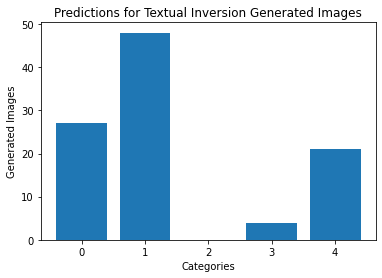

In [45]:
fig = plt.figure()
 
plt.bar(Counter(predictions.argmax(axis=1)).keys(), Counter(predictions.argmax(axis=1)).values())
 
plt.xlabel("Categories")
plt.ylabel("Generated Images")
plt.title("Predictions for Textual Inversion Generated Images")
plt.show()

In [46]:
predictions

array([[6.00329161e-01, 2.38318786e-01, 2.23388765e-02, 5.37151098e-02,
        8.52980018e-02],
       [2.69950897e-01, 6.73801064e-01, 4.33179177e-03, 5.19982073e-03,
        4.67163399e-02],
       [5.77310659e-02, 9.29122567e-01, 1.63464120e-03, 1.09185753e-02,
        5.93173143e-04],
       [3.70591342e-01, 3.73982072e-01, 5.49446158e-02, 1.49110546e-02,
        1.85570806e-01],
       [7.01907337e-01, 2.46454373e-01, 2.66980585e-02, 4.97531286e-03,
        1.99649520e-02],
       [4.55064684e-01, 3.31164062e-01, 9.40949544e-02, 3.80279118e-04,
        1.19295932e-01],
       [1.20234258e-01, 8.64312530e-01, 5.80055593e-03, 8.56415543e-04,
        8.79619271e-03],
       [1.67419672e-01, 4.28167850e-01, 4.66577290e-03, 1.99362694e-04,
        3.99547398e-01],
       [6.11904589e-03, 2.30720177e-01, 1.64167508e-02, 3.15006450e-03,
        7.43593931e-01],
       [2.02790536e-02, 7.53047347e-01, 1.30647328e-02, 6.03268575e-03,
        2.07576156e-01],
       [6.19105279e-01, 3.7551

In [47]:
#TISD2 were images created by Stable Diffusion with prompt: "landscape painting in the style of <Cezanne>"
TISD2_labels = TISD2_batches.classes

In [48]:
predictions = model.predict(x=TISD2_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({4: 14, 3: 38, 0: 26, 1: 22})

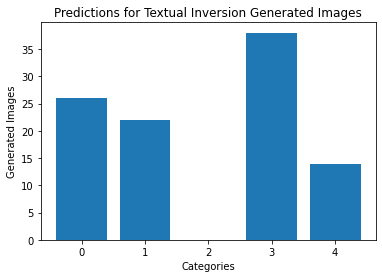

In [49]:
fig = plt.figure()
 
plt.bar(Counter(predictions.argmax(axis=1)).keys(), Counter(predictions.argmax(axis=1)).values())
 
plt.xlabel("Categories")
plt.ylabel("Generated Images")
plt.title("Predictions for Textual Inversion Generated Images")
plt.show()

In [50]:
predictions

array([[1.05566764e-02, 6.11742288e-02, 2.44594038e-01, 2.58814961e-01,
        4.24860060e-01],
       [1.94153450e-02, 5.73936617e-03, 3.81639367e-03, 9.62074101e-01,
        8.95485468e-03],
       [1.30529003e-02, 1.81974560e-01, 8.30222964e-02, 6.77510858e-01,
        4.44393754e-02],
       [6.41421825e-02, 7.51349255e-02, 4.38346155e-02, 7.24500179e-01,
        9.23880190e-02],
       [2.72259772e-01, 8.47536549e-02, 4.47725039e-03, 3.36322457e-01,
        3.02186847e-01],
       [6.84800029e-01, 4.68510576e-02, 6.30239248e-02, 8.02571848e-02,
        1.25067875e-01],
       [4.53391910e-01, 1.29921317e-01, 2.03375757e-01, 1.70107245e-01,
        4.32037525e-02],
       [5.51984906e-01, 2.18219981e-01, 6.05036914e-02, 1.67650238e-01,
        1.64114952e-03],
       [2.21484564e-02, 2.87530776e-02, 2.53710784e-02, 6.41041338e-01,
        2.82686114e-01],
       [2.06938107e-02, 9.19595063e-02, 2.27911808e-02, 8.43462825e-01,
        2.10926831e-02],
       [7.09562182e-01, 2.7811

In [51]:
#TISD3 were images created by Stable Diffusion with prompt: "painting of the Provence in the style of <Cézanne>"
TISD3_labels = TISD3_batches.classes

In [52]:
predictions = model.predict(x=TISD3_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({3: 12, 0: 34, 1: 36, 4: 18})

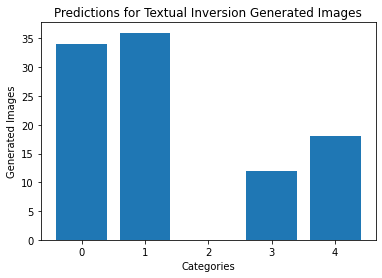

In [53]:
fig = plt.figure()
 
plt.bar(Counter(predictions.argmax(axis=1)).keys(), Counter(predictions.argmax(axis=1)).values())
 
plt.xlabel("Categories")
plt.ylabel("Generated Images")
plt.title("Predictions for Textual Inversion Generated Images")
plt.show()

In [54]:
predictions

array([[1.76691815e-01, 1.84806455e-02, 3.49219032e-02, 7.69181073e-01,
        7.24604761e-04],
       [4.48038429e-02, 3.24843340e-02, 2.26652473e-02, 7.17693329e-01,
        1.82353318e-01],
       [5.51176608e-01, 1.92024320e-01, 1.14742424e-02, 2.41141900e-01,
        4.18290542e-03],
       [5.01341760e-01, 1.03569709e-01, 2.55581029e-02, 2.31038481e-02,
        3.46426547e-01],
       [4.31620210e-01, 4.74145770e-01, 3.36158602e-03, 2.79425774e-02,
        6.29298463e-02],
       [2.92508816e-03, 8.30761611e-01, 8.01880471e-03, 5.93208009e-03,
        1.52362421e-01],
       [5.10757923e-01, 3.85273576e-01, 3.69884931e-02, 4.43657897e-02,
        2.26142388e-02],
       [1.17873522e-02, 8.38855028e-01, 9.86717455e-03, 2.96523403e-02,
        1.09838173e-01],
       [2.03895137e-01, 7.35017955e-01, 9.32718720e-03, 1.62264239e-02,
        3.55332643e-02],
       [3.84270459e-01, 5.21494031e-01, 1.44807920e-02, 6.10310473e-02,
        1.87237151e-02],
       [1.90025032e-01, 5.6843

In [55]:
#TISD4 were images created by Stable Diffusion with prompt: "painting of Mont Saint Victoire in the style of <Cézanne>"
TISD4_labels = TISD4_batches.classes

In [56]:
predictions = model.predict(x=TISD4_batches, verbose = 0)
Counter(predictions.argmax(axis=1))

Counter({3: 35, 1: 21, 0: 29, 4: 13, 2: 2})

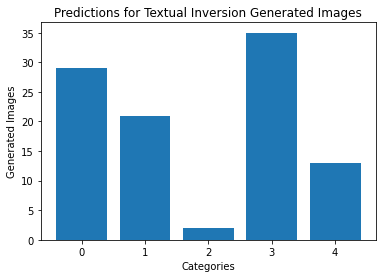

In [57]:
fig = plt.figure()
 
plt.bar(Counter(predictions.argmax(axis=1)).keys(), Counter(predictions.argmax(axis=1)).values())
 
plt.xlabel("Categories")
plt.ylabel("Generated Images")
plt.title("Predictions for Textual Inversion Generated Images")
plt.show()

In [58]:
predictions

array([[6.78793341e-03, 1.89163759e-02, 4.59847786e-02, 9.14687753e-01,
        1.36231473e-02],
       [1.98495314e-01, 7.39778399e-01, 1.21509833e-02, 4.88110110e-02,
        7.64202850e-04],
       [4.40453142e-01, 5.11536226e-02, 2.70115342e-02, 2.37935960e-01,
        2.43445769e-01],
       [6.75205767e-01, 6.77644834e-03, 1.31555181e-02, 6.17716089e-02,
        2.43090704e-01],
       [1.06971581e-02, 6.31001174e-01, 1.47223957e-02, 3.42814207e-01,
        7.65065721e-04],
       [4.82330650e-01, 1.87198281e-01, 8.41610774e-04, 1.02854734e-02,
        3.19343954e-01],
       [9.15579379e-01, 1.41847804e-02, 1.13677222e-03, 3.56675237e-02,
        3.34315300e-02],
       [2.58537441e-01, 4.61853504e-01, 1.50926625e-02, 2.46106878e-01,
        1.84094347e-02],
       [8.88306141e-01, 3.39070596e-02, 1.82128791e-02, 4.56708623e-03,
        5.50068654e-02],
       [3.32072616e-01, 9.78495851e-02, 8.77679233e-03, 3.58463347e-01,
        2.02837691e-01],
       [9.57287103e-03, 4.7681